In [1]:
from basic_data_inspection import *
from missing_values import *
from univariate_analysis import *
from bivarates_analysis import *
from multivariates_analysis import *

In [27]:
data_path = '../data/student/student-por.csv'
df = pd.read_csv(data_path,sep=';')

In [28]:
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.Inspect(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [29]:
data_inspector = DataInspector(SummaryStatisticsInspectionStrategy())
data_inspector.Inspect(df)

Summary Statistics(NumericalFeatures):
              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    

## Insights on the DataFrame

The DataFrame contains 1338 entries with 7 columns. Here is a summary of the columns and their data types:

- **age**: 1338 non-null values, type `int64`
- **sex**: 1338 non-null values, type `object`
- **bmi**: 1338 non-null values, type `float64`
- **children**: 1338 non-null values, type `int64`
- **smoker**: 1338 non-null values, type `object`
- **region**: 1338 non-null values, type `object`
- **charges**: 1338 non-null values, type `float64`

The columns `age`, `children`, and `charges` are numeric types (`int64` and `float64`), while the columns `sex`, `smoker`, and `region` are categorical types (`object`).



## Summary Statistics

### Numerical Features:
| Statistic | `Age`         | `BMI`         | `Children`    | `Charges`       |
|-----------|-------------|-------------|-------------|---------------|
| Count     | 1338        | 1338        | 1338        | 1338          |
| Mean      | 39.21       | 30.66       | 1.09        | 13270.42      |
| Std Dev   | 14.05       | 6.10        | 1.21        | 12110.01      |
| Min       | 18.00       | 15.96       | 0.00        | 1121.87       |
| 25%       | 27.00       | 26.30       | 0.00        | 4740.29       |
| Median    | 39.00       | 30.40       | 1.00        | 9382.03       |
| 75%       | 51.00       | 34.69       | 2.00        | 16639.91      |
| Max       | 64.00       | 53.13       | 5.00        | 63770.43      |

### Categorical Features:
| Feature | Count | Unique | Top       | Frequency |
|---------|-------|--------|-----------|-----------|
| Sex     | 1338  | 2      | Male      | 676       |
| Smoker  | 1338  | 2      | No        | 1064      |
| Region  | 1338  | 4      | Southeast | 364       |

In [30]:
missing_values = SimplMissingValuesAnalyser()
missing_values.identify_missing_values(df)

Missing Values:
Series([], dtype: int64)


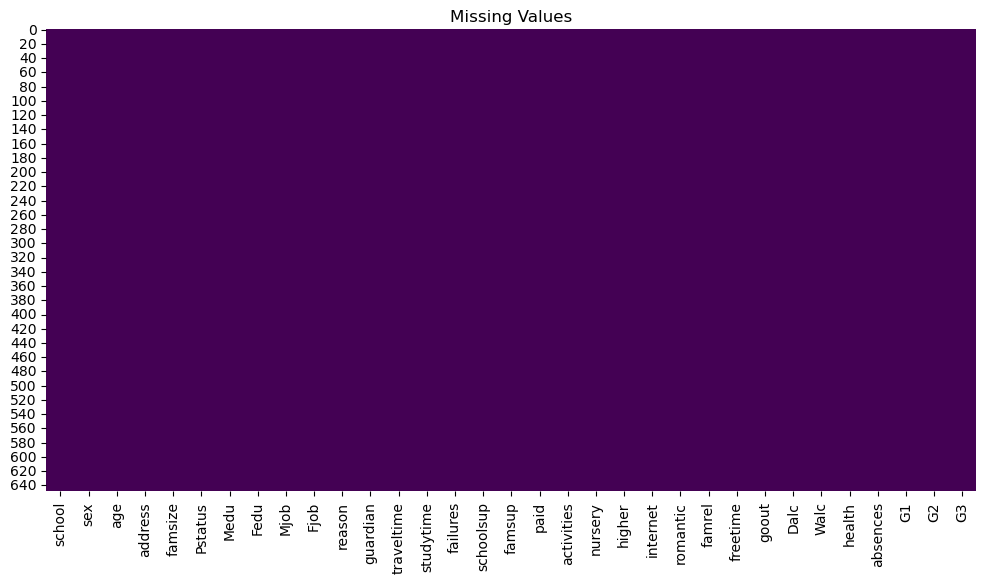

In [31]:
missing_values.plot_missing_values(df)

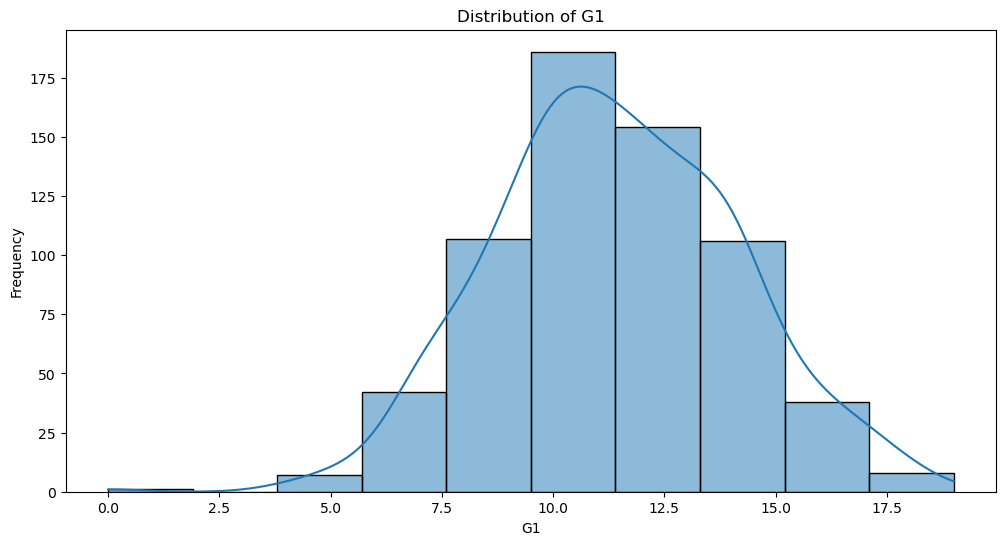

In [34]:
num_univarates_analysis = NumericalUnivaratesAnalysis()
num_univarates_analysis.analyze(df, 'G1')

## Why Normalize?

The target variable `charges` has a right-skewed distribution, meaning that most values are concentrated on the lower end while a few high values extend far to the right. This can lead to several issues in linear regression:

**Violates normality assumption**: Linear regression assumes that residuals (errors) are normally distributed. A skewed target variable often results in skewed residuals.

**High leverage of extreme values**: Outliers (very high charges) can disproportionately influence the model.

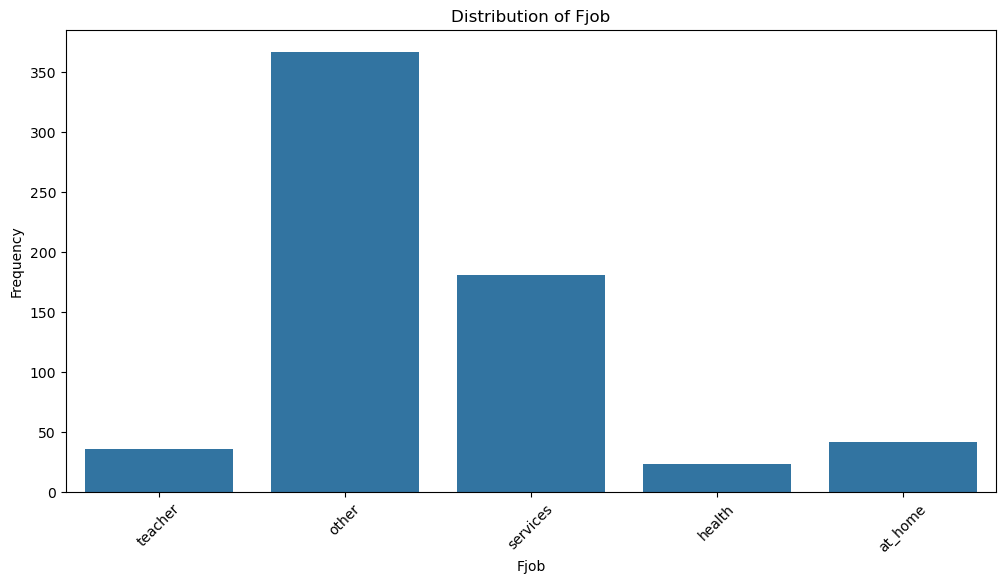

In [37]:
cat_univarates_analysis = CategoricalUnivaratesAnalysis()
cat_univarates_analysis.analyze(df, 'Fjob')

## Dealing with Imbalanced Categorical Data

The histogram of categorical data (e.g., `smoker` vs. non-`smoker`) shows an unequal distribution between the two classes. This imbalance can lead to overfitting, where the model learns to favor the majority class and performs poorly on the minority class. Here’s why we should be careful:

Bias in Predictions: The model may become biased towards predicting the majority class (non-`smokers`), leading to poor generalization.

Poor Performance on Minority Class: If the dataset is highly imbalanced, the model may struggle to correctly predict the minority class (`smokers`), reducing its usefulness.

Misleading Metrics: Accuracy alone may be misleading in imbalanced datasets. For instance, if 80% of patients are non-`smokers`, predicting "non-`smoker`" for everyone would still yield 80% accuracy but would be a poor model.

How to Handle Imbalanced Data?

To address this issue, consider the following strategies:

Resampling Techniques: Use oversampling (e.g., SMOTE) or undersampling to balance the dataset.

Class Weights: Assign higher weights to the minority class to improve learning.

Alternative Metrics: Use precision, recall, and F1-score instead of accuracy.

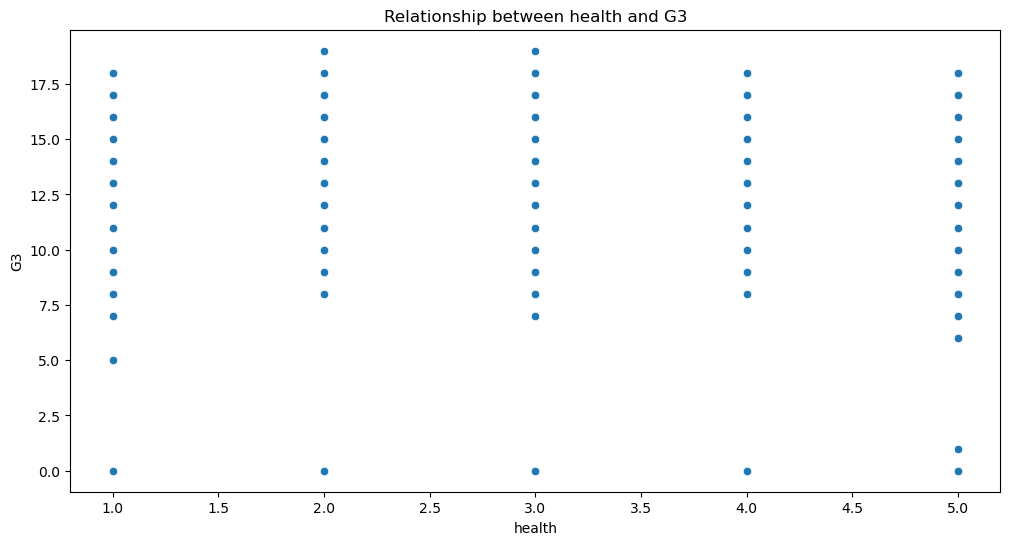

In [41]:
num_bivarates_analysis = NumericalvsNumericalAnalysis()
num_bivarates_analysis.analyze(df, 'health', 'G3')

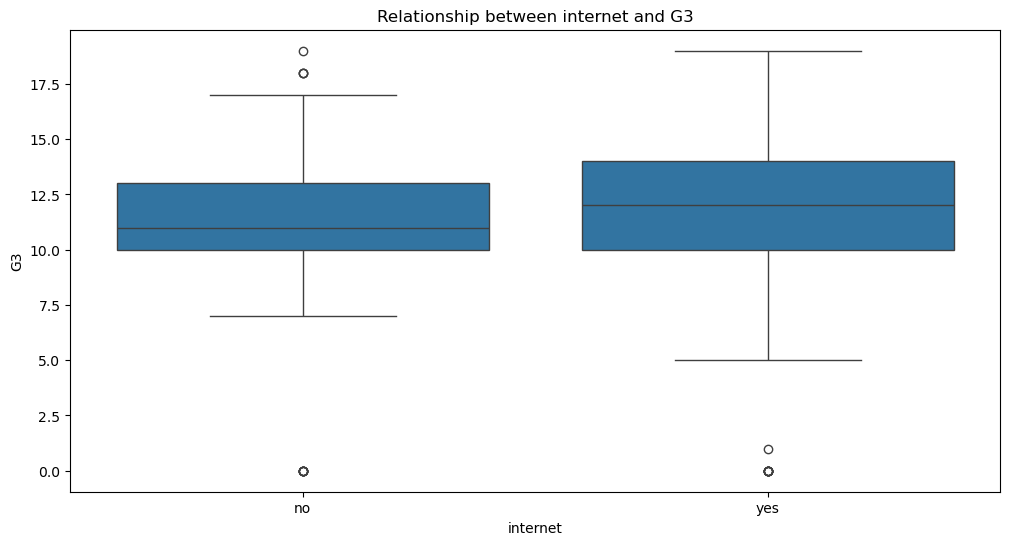

In [43]:
cat_univarates_analysis = CategoricalvsNumericalAnalysis()
cat_univarates_analysis.analyze(df, 'internet', 'G3')

# How to read a boxplot

The boxplot will display:

**Box** (Interquartile Range - IQR):
The box represents the middle 50% of the data (from Q1 - 25th percentile to Q3 - 75th percentile).
The line inside the box indicates the median (Q2 - 50th percentile).

**Whiskers**:
The whiskers extend to the smallest and largest values within 1.5 times the IQR.
Data points beyond the whiskers are considered outliers.

**Outliers**:

Individual points outside the whiskers represent outliers, which may indicate anomalies or extreme values.

**Comparing Categories** (feature1):

If boxes are at different heights, there may be a significant difference in feature2 across categories.

Overlapping IQRs suggest similar distributions, while non-overlapping IQRs suggest different distributions.

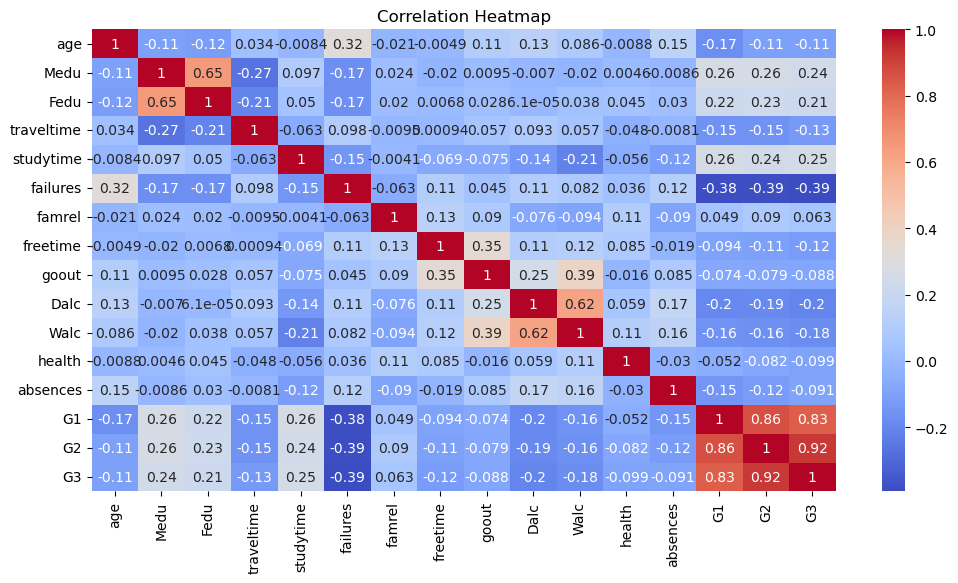

In [44]:
multivarates_analysis = SimpleMultivaratesAnalyzer()
multivarates_analysis.generate_correlation_heatmap(df)


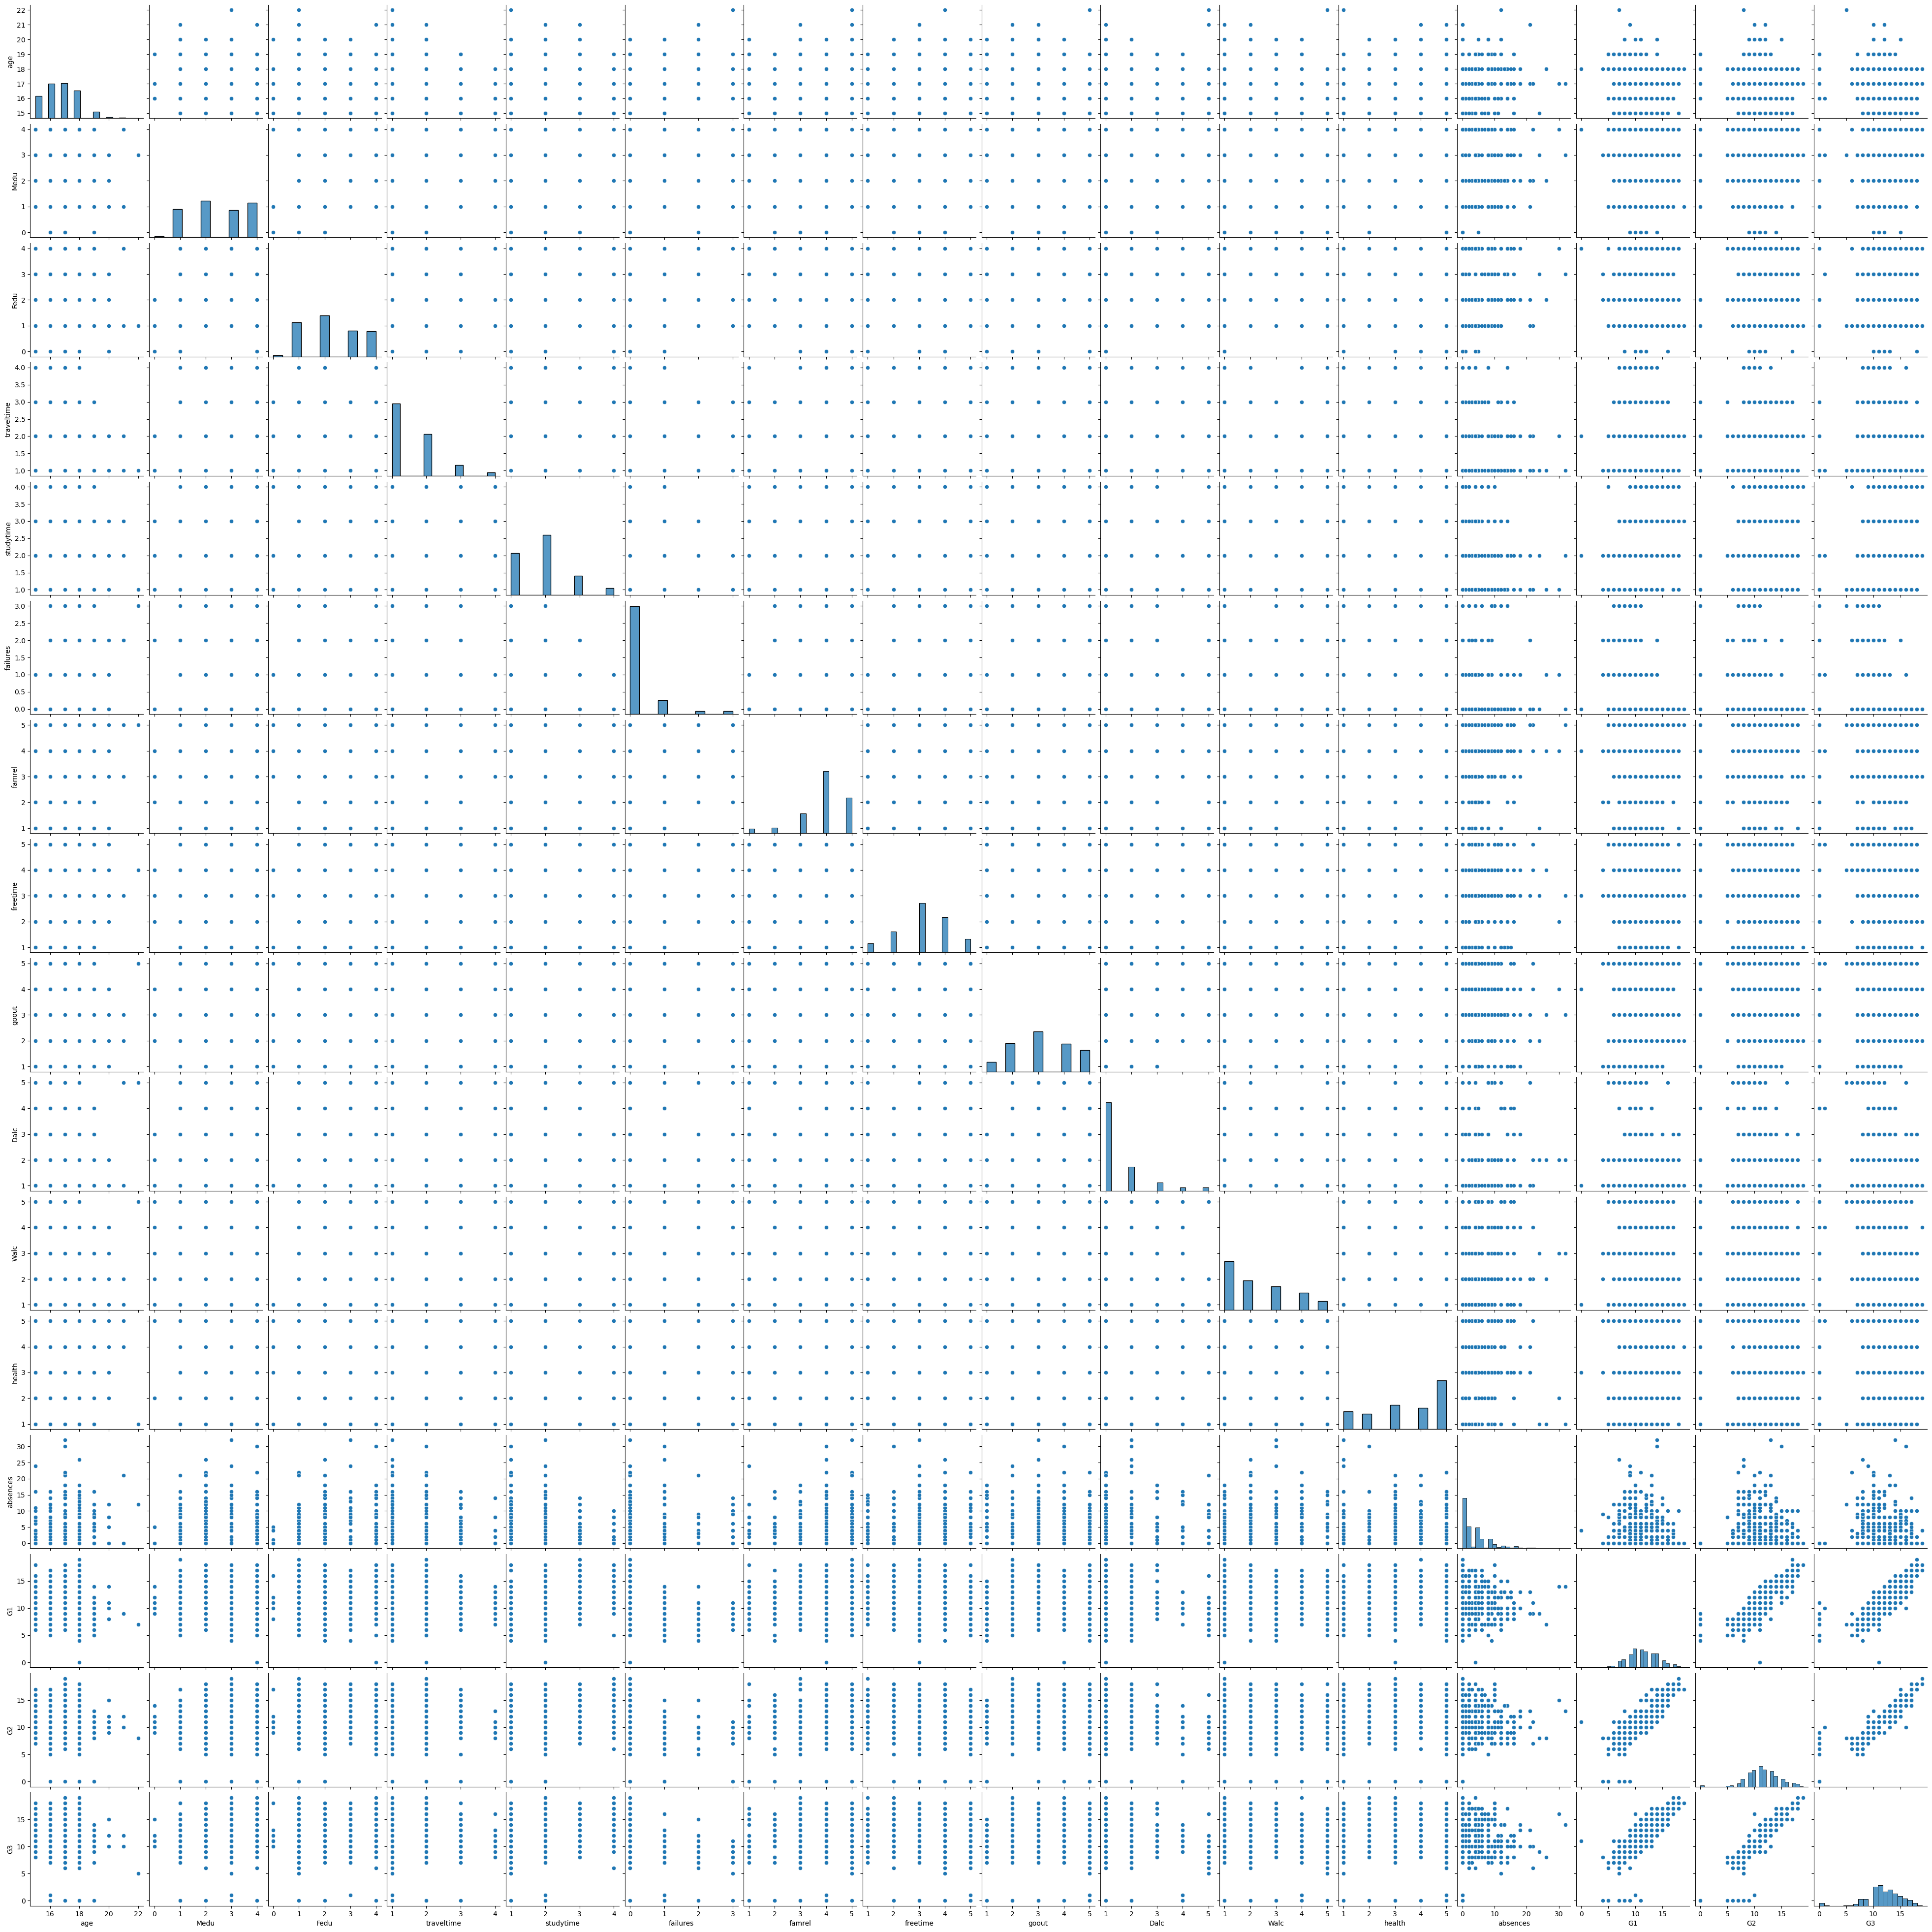

In [45]:
multivarates_analysis.generate_pairplot(df)